170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 425s 2us/step


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3446 - loss: 1.7644 - val_accuracy: 0.5274 - val_loss: 1.2939
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5743 - loss: 1.1981 - val_accuracy: 0.5970 - val_loss: 1.1270
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6320 - loss: 1.0415 - val_accuracy: 0.6383 - val_loss: 1.0471
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6733 - loss: 0.9251 - val_accuracy: 0.6699 - val_loss: 0.9262
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6982 - loss: 0.8529 - val_accuracy: 0.6828 - val_loss: 0.9114
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7227 - loss: 0.7858 - val_accuracy: 0.6944 - val_loss: 0.8730
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7404 - loss: 0.7441 - val_accuracy: 0.7006 - val_loss: 0.8724
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7603 - loss: 

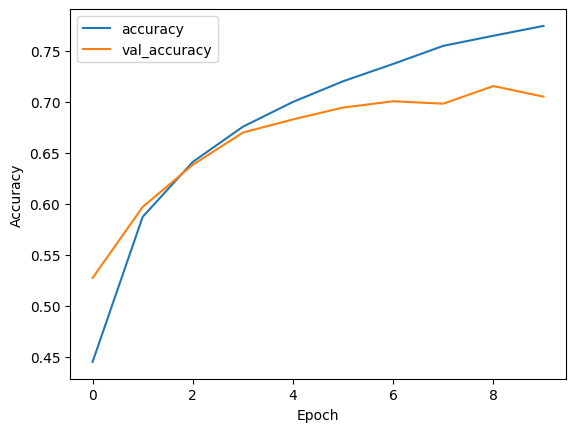

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
 
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
 
# Define ConvNet architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])
 
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
 
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
 
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)
 
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This code implements a convolutional neural network (CNN) using TensorFlow/Keras to classify images from the CIFAR-10 dataset. It involves loading the data, defining the CNN architecture, compiling and training the model, evaluating the performance, and plotting the training results. Here's a detailed explanation of each section:

### 1. Importing Libraries
- `import tensorflow as tf`: Imports TensorFlow, the core library for building and training neural networks.
- `from tensorflow.keras import layers, models`: Imports the Keras module, which provides high-level APIs for building neural network architectures.
- `from tensorflow.keras.datasets import cifar10`: Imports the CIFAR-10 dataset, a common dataset for image classification.
- `import matplotlib.pyplot as plt`: Imports Matplotlib, a plotting library for visualizing results.

### 2. Loading and Normalizing the CIFAR-10 Dataset
- `x_train, y_train, x_test, y_test`: Assigns the training and testing data from CIFAR-10. The CIFAR-10 dataset contains 60,000 color images of size 32x32 in 10 classes.
- `x_train, x_test = x_train / 255.0, x_test / 255.0`: Normalizes the pixel values to the range [0, 255] by dividing by 255. This helps with training, as it brings all pixel values to a common scale between 0 and 1.

### 3. Defining the CNN Architecture
- `model = models.Sequential([ ... ])`: Creates a sequential model, where layers are added in sequence.
  - **First Convolutional Layer**:
    - `layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))`: Adds a convolutional layer with 32 filters, each with a 3x3 kernel, using the ReLU activation function. The `input_shape` is specified as 32x32 pixels with 3 color channels (RGB).
  - **First Pooling Layer**:
    - `layers.MaxPooling2D((2, 2))`: Adds a max-pooling layer with a 2x2 pool size, reducing the spatial dimensions by half (16x16).
  - **Second Convolutional Layer**:
    - `layers.Conv2D(64, (3, 3), activation='relu')`: Adds a second convolutional layer with 64 filters and a 3x3 kernel.
  - **Second Pooling Layer**:
    - `layers.MaxPooling2D((2, 2))`: Adds a second max-pooling layer, further reducing the spatial dimensions to 8x8.
  - **Third Convolutional Layer**:
    - `layers.Conv2D(64, (3, 3), activation='relu')`: Adds a third convolutional layer with 64 filters and a 3x3 kernel.
  - **Flatten Layer**:
    - `layers.Flatten()`: Flattens the 3D tensor into a 1D vector, preparing it for the dense layers.
  - **First Dense Layer**:
    - `layers.Dense(64, activation='relu')`: Adds a dense (fully connected) layer with 64 units, using ReLU activation.
  - **Output Dense Layer**:
    - `layers.Dense(10)`: Adds a final dense layer with 10 units (for the 10 CIFAR-10 classes). This layer doesn't have an activation function, as it's followed by a loss function that expects logits (raw output).

### 4. Compiling the Model
- `model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])`: Compiles the model with the following settings:
  - `optimizer='adam'`: Uses the Adam optimizer, which is a popular choice for neural networks.
  - `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: Uses sparse categorical cross-entropy as the loss function, indicating that the labels are not one-hot encoded and the model outputs logits.
  - `metrics=['accuracy']`: Tracks accuracy during training and evaluation.

### 5. Training the Model
- `history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))`: Trains the model on the training data for 10 epochs and uses the testing data for validation. The `history` object captures information about the training process, such as accuracy and validation accuracy.

### 6. Evaluating the Model
- `test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)`: Evaluates the model's performance on the testing data, returning the loss and accuracy. The `verbose=2` parameter controls the amount of output during evaluation, with 2 being a moderate level of detail.
- `print("\nTest accuracy:", test_acc)`: Prints the test accuracy to see how well the model performed.

### 7. Plotting Training and Validation Accuracy
- `plt.plot(history.history['accuracy'], label='accuracy')`: Plots the training accuracy over epochs.
- `plt.plot(history.history['val_accuracy'], label='val_accuracy')`: Plots the validation accuracy over epochs.
- `plt.xlabel('Epoch')`: Sets the x-axis label to 'Epoch'.
- `plt.ylabel('Accuracy')`: Sets the y-axis label to 'Accuracy'.
- `plt.legend()`: Adds a legend to distinguish between training and validation accuracy.
- `plt.show()`: Displays the plot, providing a visual representation of training and validation accuracy over time.

### Summary
This code demonstrates the implementation of a convolutional neural network for classifying images in the CIFAR-10 dataset. It includes model definition, training, evaluation, and visualization of training progress. The model uses convolutional and pooling layers to process image data, and dense layers for final classification. It also employs the Adam optimizer and sparse categorical cross-entropy for training, showing a typical approach to building and training CNNs with TensorFlow/Keras.